welcome to my kernel about FIFA 19 dataset

in this kernel i will use FIFA 19 dataset to show different insights about player's values ,wages and their different attributes like age, overall, speed, ability to take freekicks and more, also i've done some EDA to understand the distribution of the features 

i used other datasets also to show the change of overall for some players over years

if you have any suggest,advice or correction please don't hesitate to write it, i think it will be very helpful for me and if you like this kernel an upvote would be great.



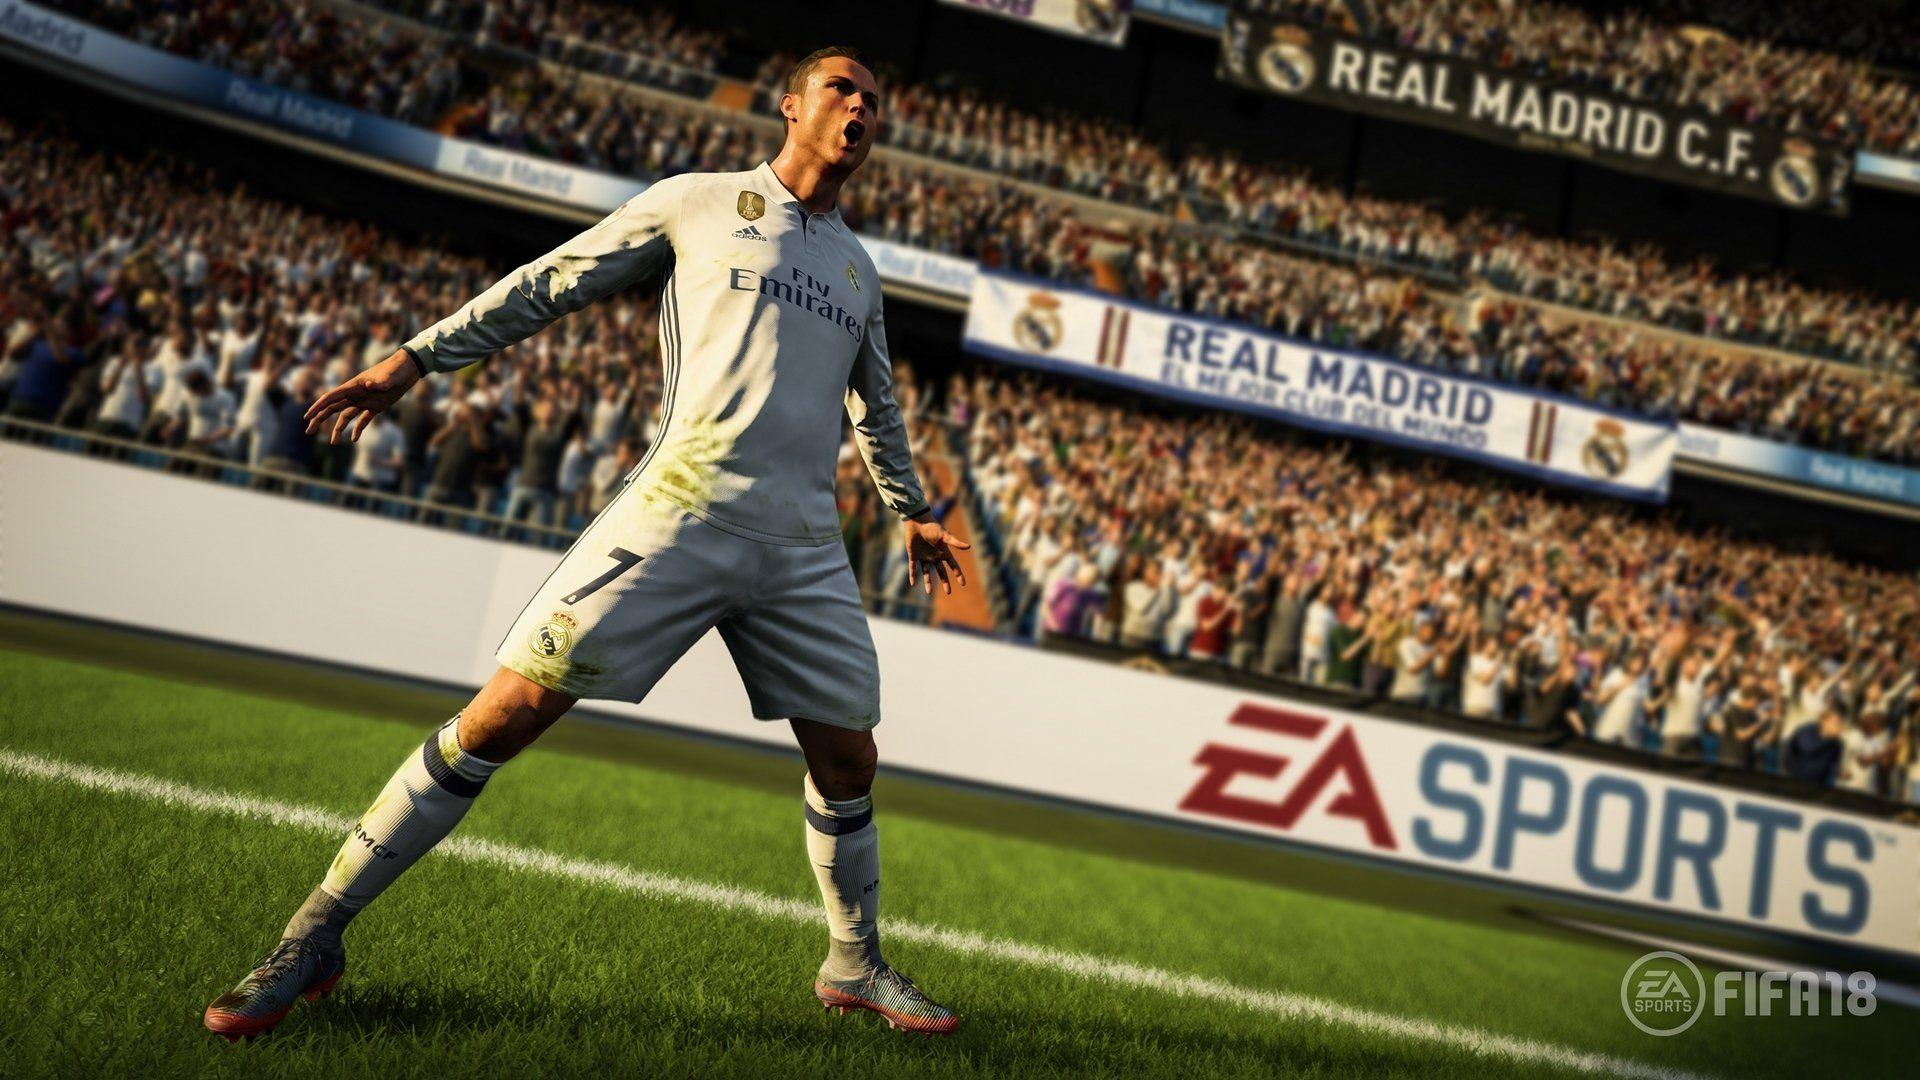

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('ggplot')
#plt.style.use('tableau-colorblind10')

%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)
data= pd.read_csv("../input/fifa19/data.csv")


In [ ]:
data.head()

### let's get rid of sympols beside Value and Wage columns

In [ ]:
def value_and_wage_conversion(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)


data['Value'] = data['Value'].apply(lambda x: value_and_wage_conversion(x))
data['Wage'] = data['Wage'].apply(lambda x: value_and_wage_conversion(x))

data['Wage'].head()

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data.columns

In [ ]:
data['Club'].fillna('No Club', inplace = True)
data['Position'].fillna('unknown', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)


In [ ]:
data.isnull().sum()

In [ ]:
new_data=data[["Name","Nationality","Club","Age",'Overall','Position',"Preferred Foot",'Value','Wage','Work Rate','International Reputation', 'Skill Moves', 'Finishing', 'FKAccuracy', 'SprintSpeed']]

new_data.head()


In [ ]:
new_data.shape

In [ ]:
new_data.info()

In [ ]:
new_data.isnull().sum()

In [ ]:
new_data["International Reputation"].fillna(3, inplace = True)
new_data['Skill Moves'].fillna(3, inplace = True)
new_data['Finishing'].fillna(int(new_data['Finishing'].median()), inplace = True)
new_data["FKAccuracy"].fillna(int(new_data["FKAccuracy"].median()), inplace = True)
new_data["SprintSpeed"].fillna(int(new_data["SprintSpeed"].median()), inplace = True)


In [ ]:
new_data.isnull().sum()

In [ ]:
sns.pairplot(new_data[["International Reputation","Skill Moves","Finishing","FKAccuracy","SprintSpeed"]], palette='deep')


In [ ]:
plt.figure(figsize=(15, 7))
#new_data["International Reputation"].plot(kind="hist")
#new_data["Finishing"].plot(kind="hist")
#new_data["Skill Moves"].plot(kind="hist")
#new_data["FKAccuracy"].plot(kind="hist")
new_data["SprintSpeed"].plot(kind="hist")

plt.xlabel("overall")
plt.title("Sprint Speed distribution", fontsize = 20)

plt.show()

In [ ]:
new_data[new_data["International Reputation"] == 5]

### Visualizing some skills with top 10 players acquire each one of them

In [ ]:
top_speed = new_data.sort_values(by=['SprintSpeed'], ascending=False).head(10)
fk = new_data.sort_values(by=['FKAccuracy'], ascending=False).head(10)
sk = new_data.sort_values(by=['Skill Moves',"Overall"], ascending=False).head(10)
finish = new_data.sort_values(by=['Finishing'], ascending=False).head(10)


In [ ]:
fig, ax1 = plt.subplots(nrows=4, ncols=1, figsize=[15, 25])


p1 = sns.lineplot(top_speed["Name"],top_speed["SprintSpeed"],ax = ax1[0], color = "royalblue")
#p1.set_yscale("log")
p1.set_title("fastest 10 players in fifa", fontsize=18)
#p1.set_yticks([0, 20,40,60,80,100])
#p1.set_yticklabels(['0', '20','40','60','80','100']);


p2 = sns.lineplot(fk["Name"],fk["FKAccuracy"],ax = ax1[1], color = "royalblue")
p2.set_title("best Free kick takers", fontsize=18)
#p2.set_yscale("log")
#p2.set_yticks([0, 0.2,0.4,0.6,0.8,1])
#p2.set_yticklabels(['0', '20','40','60','80','100'])

p3 = sns.lineplot(sk["Name"],sk["Overall"],ax = ax1[2], color = "royalblue")
p3.set_title("best Skilled players", fontsize=18)
#p3.set_yscale("log")

p4 = sns.lineplot(finish["Name"],finish["Finishing"],ax = ax1[3], color = "royalblue")
p4.set_title("best Finishers", fontsize=18)
#p4.set_yscale("log")

plt.show()

In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (13, 7)
sns.countplot(new_data['Preferred Foot'])
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (15, 7)

sns.countplot(new_data['Position'],color="royalblue")
plt.title("Player's positions distribution", fontsize = 20)
plt.tick_params(axis='x', rotation=70)
plt.show()

### a little bit confusing, let's try a trick

In [ ]:
new_data['Position'].unique()

In [ ]:
conditions = [
    (new_data['Position'] == 'RF') | (new_data['Position'] == 'ST') | (new_data['Position'] == 'LW') | (new_data['Position'] == 'LF') | (new_data['Position'] == 'RS') | (new_data['Position'] == 'LS') | (new_data['Position'] == 'RW') | (new_data['Position'] == 'CF')
    ,(new_data['Position'] == 'RCM') | (new_data['Position'] == 'LCM') | (new_data['Position'] == 'LDM') | (new_data['Position'] == 'CAM') | (new_data['Position'] == 'CDM') | (new_data['Position'] == 'RM') | (new_data['Position'] == 'LAM') | (new_data['Position'] == 'LM') | (new_data['Position'] == 'RDM') & (new_data['Position'] == 'CM') | (new_data['Position'] == 'RAM')
    ,(new_data['Position'] == 'RCB') | (new_data['Position'] == 'CB') | (new_data['Position'] == 'LCB') | (new_data['Position'] == 'LB') | (new_data['Position'] == 'RB') | (new_data['Position'] == 'LWB') | (new_data['Position'] == 'RWB')
    ,(new_data['Position'] == 'GK')]

choices = ['ATK','MID','DEF',"GK"]
new_data['general position'] = np.select(conditions, choices, default='unkown')
new_data['general position']

In [ ]:
plt.rcParams['figure.figsize'] = (15, 7)

sns.countplot(new_data['general position'],palette="deep")
plt.title("Player's positions distribution", fontsize = 20)
plt.tick_params(axis='x', rotation=70)
plt.show()

### much better, as you can see in the first plot that it may misleading us to think that attack players are more than other players just because the number of ST players

## Now let's analyse the highest players values for every position, as follows:
**attack as  ST**

**midfield as CM**

**defence as CB**

**goalkeeping as GK**



### - We need to merge LCM and RCM to CM to get the total number of CMs , so do with CB, RCB ,LCB
### - each position will be colored with it's color in the game

In [ ]:
st_total= new_data[new_data["Position"] == "ST"].head(10)
st_total = st_total.sort_values(by=['Value'], ascending=False).head(10)
st_total

#------------------------------------------------------------------------
cm = new_data[new_data["Position"] == "CM"]
rcm = new_data[new_data["Position"] == "RCM"]
lcm = new_data[new_data["Position"] == "LCM"]

cm_total = pd.concat([cm, rcm,lcm], ignore_index=True)
top_cm = cm_total.sort_values(by=['Value'], ascending=False).head(10)

#------------------------------------------------------------------------
cb = new_data[new_data["Position"] == "CB"]
rcb = new_data[new_data["Position"] == "RCB"]
lcb = new_data[new_data["Position"] == "LCB"]

cb_total = pd.concat([cb, rcb,lcb], ignore_index=True)
top_cb = cb_total.sort_values(by=['Value'], ascending=False).head(10)

#------------------------------------------------------------------------

top_gk= new_data[new_data["Position"] == "GK"].head(10)


In [ ]:
def top10_position_value(df , color ,position,ax):
    
    plt.style.use('tableau-colorblind10')
    
    sns.barplot(df["Name"],df["Value"],color=color , ax=ax).set_title("top 10 " + position +" players according to their value", fontsize=18)
            
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
        

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[20, 17])

top10_position_value(st_total , "crimson" ,"ST" , axes[0,0])

top10_position_value(top_cm   , "g"       ,"CM" , axes[0,1])

top10_position_value(top_cb   , "b"       ,"CB" , axes[1,0])

top10_position_value(top_gk   , "y"       ,"GK" , axes[1,1])


In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)

new_data["Value"].plot(kind="line")

plt.title("Player's Values distribution ", fontsize = 20)
plt.show()

In [ ]:
top_10_values = new_data.sort_values(by=['Value'], ascending=False).head(10)
top_10_values

In [ ]:
fig, ax2 = plt.subplots(nrows=2, ncols=1, figsize=[13, 11])

sns.barplot(top_10_values['Name'],top_10_values['Value'],color="c", ax =ax2[0]).set_title("Top 10 values in fifa", fontsize=18)

top_10_players_overall_value = new_data.sort_values(by=['Overall'], ascending=False).head(10)
top_10_players_overall_value
sns.barplot(top_10_players_overall_value["Name"].head(10),top_10_players_overall_value["Value"].head(10),color="c", ax =ax2[1]).set_title("Values of Top 10 players", fontsize=18)



In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)

new_data["Wage"].plot(kind="line")

plt.title("Player's wages distribution ", fontsize = 20)
plt.show()

In [ ]:
top_10_wages = new_data.sort_values(by=['Wage'], ascending=False).head(10)
top_10_wages

In [ ]:
fig, ax3 = plt.subplots(nrows=2, ncols=1, figsize=[15, 11])

sns.barplot(top_10_wages['Name'],top_10_wages['Wage'],color="plum", ax =ax3[0]).set_title("Top 10 wages in fifa", fontsize=18)

top_10_players_overall_wage = new_data.sort_values(by=['Wage'], ascending=False).head(10)
top_10_players_overall_wage
sns.barplot(top_10_players_overall_wage["Name"].head(10),top_10_players_overall_wage["Value"].head(10),color="plum", ax =ax3[1]).set_title("Wages of Top 10 players", fontsize=18)

In [ ]:
new_data["Age"]
new_data["Overall"]
new_data["Work Rate"]

In [ ]:
new_data["Age"].astype(int)

In [ ]:
new_data["Age"].dtype

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(new_data["Work Rate"],palette="Blues_d")
#new_data["Work Rate"].plot(kind="bar")

plt.title("Work Rate frequency", fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize=(42, 10))

plt.subplot(131)
plt.bar(new_data["Work Rate"],new_data["Age"])
plt.ylabel("age")
plt.xlabel("work_rate")

plt.title("The relation between player age and his work rate", fontsize = 20)
plt.show()

In [ ]:
#new_data["Overall"].plot(kind="hist")
plt.figure(figsize=(15, 7))

sns.countplot(new_data['Overall'])
#plt.tick_params(axis='x', rotation=70)

plt.title("overall", fontsize = 20)

plt.show()

In [ ]:
plt.figure(figsize=(15, 7))
new_data["Overall"].plot(kind="hist",color="violet")

#plt.tick_params(axis='x', rotation=70)

plt.title("overall")
plt.xlabel("overall")
plt.title("overall histogram", fontsize = 20)

plt.show()

In [ ]:
plt.figure(figsize=(15, 7))
#sns.set(style = "dark", palette = "deep", color_codes = True)

new_data["Age"].plot(kind="hist",color='tomato')

plt.title("overall")
plt.xlabel("overall")
plt.title("ages distribution", fontsize = 20)

plt.show()

In [ ]:
plt.figure(figsize=(40, 7))

plt.subplot(131)
plt.scatter(new_data["Age"], new_data["Overall"],marker="x")

plt.ylabel("overall")
plt.xlabel("age")

plt.title('relation between age and overall',fontsize=20)
plt.show()

### there is no data for age 43

In [ ]:
new_data[new_data["Age"] == 43]

In [ ]:
cb = cb_total[cb_total["Work Rate"] == "High/ High"]
cb_work_rate = cb.sort_values(by=['Overall'], ascending=False).head(10)
cb_work_rate

In [ ]:
fig, ax4 = plt.subplots(nrows=2, ncols=1, figsize=[13, 12])

sns.barplot(cb_work_rate["Name"], cb_work_rate["Age"],color="blue", ax =ax4[0]).set_title("CBs that have high attack and defence rate above 80 overall", fontsize=18)



st_work_rate_total= new_data[new_data["Position"] == "ST"]
st = st_work_rate_total[st_work_rate_total["Work Rate"] == "High/ High"]
st_work_rate = st[st["Overall"] >= 80]
st_work_rate
sns.barplot(st_work_rate["Name"], st_work_rate["Age"],color="crimson", ax =ax4[1]).set_title("STs that have high attack and defence rate above 80 overall", fontsize=18)


### Real madrid players info

In [ ]:
def Club(x):
    return new_data[new_data['Club'] == x ][['Name','Age','Club',"Value","Position"]].sort_values(by=['Value'],ascending=False)

Real_Madrid = Club('Real Madrid')
Real_Madrid

In [ ]:

#barca = new_data.loc[new_data['Club']=='FC Barcelona']

plt.figure(figsize=(50, 6))

plt.subplot(131)
plt.bar(Real_Madrid["Name"],Real_Madrid["Value"],color="k")
plt.tick_params(axis='x', rotation=70)

plt.ylabel("Value")
plt.xlabel("Name")

plt.title("Real madrid player's values", fontsize = 20)
plt.show()

In [ ]:
new_data["Nationality"].head()

In [ ]:
co_ordinates = pd.read_csv("../input/world-coordinates/world_coordinates.csv")
co_ordinates[co_ordinates["Country"] == "Belgium"]

In [ ]:
latitude = [-38.416097,39.399872,-14.235004,40.463667,50.503887]
longitude = [-63.616672,-8.224454,-51.92528,-3.74922,4.469936]
overall = new_data["Overall"].head()


In [ ]:
new_data["Nationality"]

### top 5 players in the world with their overall and nationality

In [ ]:
import folium
incidents = folium.Map(location=[10, -20], zoom_start=2.4,tiles='CartoDB dark_matter')

# loop through the 100 crimes and add each to the incidents feature group
for lat, log, overall,Nationality,name in zip( latitude,longitude, overall,new_data["Nationality"],new_data["Name"]):
    
    folium.CircleMarker(
            [lat, log],
            radius=15,
            popup = ('<strong>name</strong>: ' + str(name) + '<br>'
                     '<strong>Nationality</strong>: ' + str(Nationality).capitalize() + '<br>'
            '<strong>overall</strong>: ' + str(overall) + '<br>'), # define how big you want the circle markers to be
            color='green',
            fill_color='green',
            fill_opacity=0.7
        ).add_to(incidents)
    

# add incidents to map
incidents

In [ ]:

natio_count = new_data["Nationality"].value_counts().head()
natio_count

In [ ]:
dummy_data = {
        'top5': ["England","Germany","Spain","Argentina","France"],
        'long': [1.1743,10.451526,-3.74922,-63.616672,2.213749],
        'late': [52.3555,51.165691,40.463667,-38.416097,46.227638]
}
data_new= pd.DataFrame(dummy_data, columns = ["top5",'long','late'])

data_new

In [ ]:
co_ordinates[co_ordinates["Country"] == "Spain"]

### Top 5 countries with the most number of players in it

In [ ]:
import folium
incidents_2 = folium.Map(location=[10, -20], zoom_start=2.4,tiles='CartoDB dark_matter')

# loop through the 100 crimes and add each to the incidents feature group
for lat, log,country,count in zip( data_new["late"],data_new["long"],data_new["top5"],natio_count):
    
    folium.CircleMarker(
            [lat, log],
            radius=15,
            popup = ('<strong>natio_count</strong>: ' + str(count) + '<br>'
                     '<strong>country</strong>: ' + str(country).capitalize() + '<br>'), # define how big you want the circle markers to be
            color='yellow',
            fill_color='yellow',
            fill_opacity=0.7
        ).add_to(incidents_2)
    

# add incidents to map
incidents_2

### now let's go and see overall changes for cristiano ronaldo and mbappe

In [ ]:
fifa17 = pd.read_csv("../input/fifa-20-complete-player-dataset/players_17.csv")
fifa18 = pd.read_csv("../input/fifa-18-demo-player-dataset/CompleteDataset.csv")
fifa19 = pd.read_csv("../input/fifa19/data.csv")
fifa20 = pd.read_csv("../input/fifa-20-complete-player-dataset/players_20.csv")

In [ ]:
fifa17.head(1)

In [ ]:
fifa_17 = fifa17["short_name"][0]
fifa_18 = fifa18["Name"][0]
fifa_19 = fifa19["Name"][1]
fifa_20 = fifa20["short_name"][1]

overall_17 = fifa17["overall"][0]
overall_18 = fifa18["Overall"][0]
overall_19 = fifa19["Overall"][1]
overall_20 = fifa20["overall"][1]

age_17 = fifa17["age"][0]
age_18 = fifa18["Age"][0]
age_19 = fifa19["Age"][1]
age_20 = fifa20["age"][1]

In [ ]:
dummy_data = {
        'name': [fifa_17,fifa_18,fifa_19,fifa_20],
        'overall': [overall_17,overall_18,overall_19,overall_20],
        'age': [age_17,age_18,age_19,age_20]
}

In [ ]:
CR7 = pd.DataFrame(dummy_data, columns = ['name','overall',"age"])

CR7

In [ ]:
plt.plot(CR7["age"],CR7["overall"])

plt.ylabel("age")
plt.xlabel("work_rate")

plt.title("Cristiano ronaldo overall changes for the past 4 years", fontsize = 20)
plt.show()

In [ ]:
fifa17 = fifa17[fifa17["club"] == 'AS Monaco']
fifa17[fifa17["short_name"] == "K. Mbappe Lottin"]

In [ ]:
fifa17[fifa17["short_name"] == "K. Mbappe Lottin"]

In [ ]:
fifa20[fifa20["short_name"] == "K. Mbappé"]

In [ ]:
mbappe_fifa_17 = fifa17["short_name"][3899]
mbappe_fifa_18 = fifa18["Name"][127]
mbappe_fifa_19 = fifa19["Name"][25]
mbappe_fifa_20 = fifa20["short_name"][10]

mbappe_overall_17 = fifa17["overall"][3899]
mbappe_overall_18 = fifa18["Overall"][127]
mbappe_overall_19 = fifa19["Overall"][25]
mbappe_overall_20 = fifa20["overall"][10]

mbappe_age_17 = fifa17["age"][3899]
mbappe_age_18 = fifa18["Age"][127]
mbappe_age_19 = fifa19["Age"][25]
mbappe_age_20 = fifa20["age"][10]

In [ ]:
dummy_data2 = {
        'name': [mbappe_fifa_17,mbappe_fifa_18,mbappe_fifa_19,mbappe_fifa_20],
        'overall': [mbappe_overall_17,mbappe_overall_18,mbappe_overall_19,mbappe_overall_20],
        'age': [mbappe_age_17,mbappe_age_18,mbappe_age_19,mbappe_age_20]
}

In [ ]:
mbappe = pd.DataFrame(dummy_data2, columns = ['name','overall',"age"])

mbappe

In [ ]:
sns.lineplot(mbappe['age'], mbappe["overall"], palette = 'Wistia')

plt.ylabel("age")
plt.xlabel("work_rate")

plt.title("Kylian Mbappé overall changes for the past 4 years", fontsize = 20)
plt.show()

### detecting outliers

In [ ]:
box_plot_data = data[["Age",'Overall',"Wage","Value",'Skill Moves', 'Finishing', 'FKAccuracy', 'SprintSpeed']]


In [ ]:
ax = sns.boxplot(data=box_plot_data)
plt.tick_params(axis='x', rotation=30)

### so, this plot won't be useful with value and wage columns because the varaity of the data in them, i will plot them separatly

In [ ]:
box_plot_data = data[["Age",'Overall','Skill Moves', 'Finishing', 'FKAccuracy', 'SprintSpeed']]

ax = sns.boxplot(data=box_plot_data)
plt.tick_params(axis='x', rotation=30)

In [ ]:
import seaborn as sns
sns.boxplot(x=new_data["Wage"])

### it was expected that there is alot of outliers because it is a continuous data, lets see Value's column

In [ ]:
sns.boxplot(x=new_data["Value"])

### let's see also Skill Moves column's boxplot as it is not clarefied enough in the above plot

In [ ]:
sns.boxplot(x=new_data["Skill Moves"])

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(new_data["Value"],new_data["Age"])
ax.set_xlabel('Value')
ax.set_ylabel('Age')
plt.show()

### let's see the biggest 3 outliers shown here

In [ ]:
new_data.sort_values(by= ["Value"], ascending = False).head(3)
